In [2]:
import sys
sys.path.append('../')

from main import *

model = MODEL()

In [2]:
import sbtab
import re


filepath = "../Exemples/SBtab/E Coli Core/Model.tsv"
filename = filepath.split('/')[-1]
St = sbtab.SBtab.read_csv(filepath=filepath, document_name=filename)


In [3]:
tabs = St.sbtabs

for tab in tabs :
    print(tab.table_name)

tab = tabs[-3]

print()
print(tab.columns)

index_flux = tab.columns_dict['!Value']

for i in range(len(tab.value_rows)) :
    print(tab.value_rows[i][index_flux])


Reaction
Compound
Network layout
Metabolite concentration
Metabolic flux
Reaction Gibbs free Energy
Equilibrium constant

['!QuantityType', '!Reaction', '!Value']
-0.20511348
-0.20511348
-0.226108
0.154
0.154
-0.226108
-0.021766248
0.11904906
0.59540981
0.026323062
-0.69497404
0.154
1.5023887
0.88083351
0.4436534
0.311755
-0.12557109
0.092399999
-0.033171095
0.15194326
0.9203181
0.52036098
-0.13687992
-0.0068439961
0.15194326
-0.95347458
0.14747796
0.006522037
0.006522037
0.0602
0.038722036
1.3768177
0.010217104
0.14372392
0.75119437
0.3787
0.4436534
0.311755
0.36315311
-0.9203181
0.15194326
-0.88083351
0.096868869
0.2114
0.070481718
-0.021766248
0.226108
0.1841
0.082342904
-0.069600359
1.2722212
1.2722212
-0.11904906
0.045909603
0.045909603
0.036433301
0.4436534


In [3]:
model.read_SBtab()

model.default_JSON = "../Exemples/SBtab/E Coli Core/e_coli_core_model.json"
model.default_Escher = "../Exemples/SBtab/E Coli Core/e_coli_core_map.json"

model.enzymes.add_to_all_reaction()
model.parameters.add_externals()
model.parameters.add_enzymes()
model.elasticity.s.half_satured()
model.parameters.remove("Temperature")

 
Name of the removed parameter : Temperature


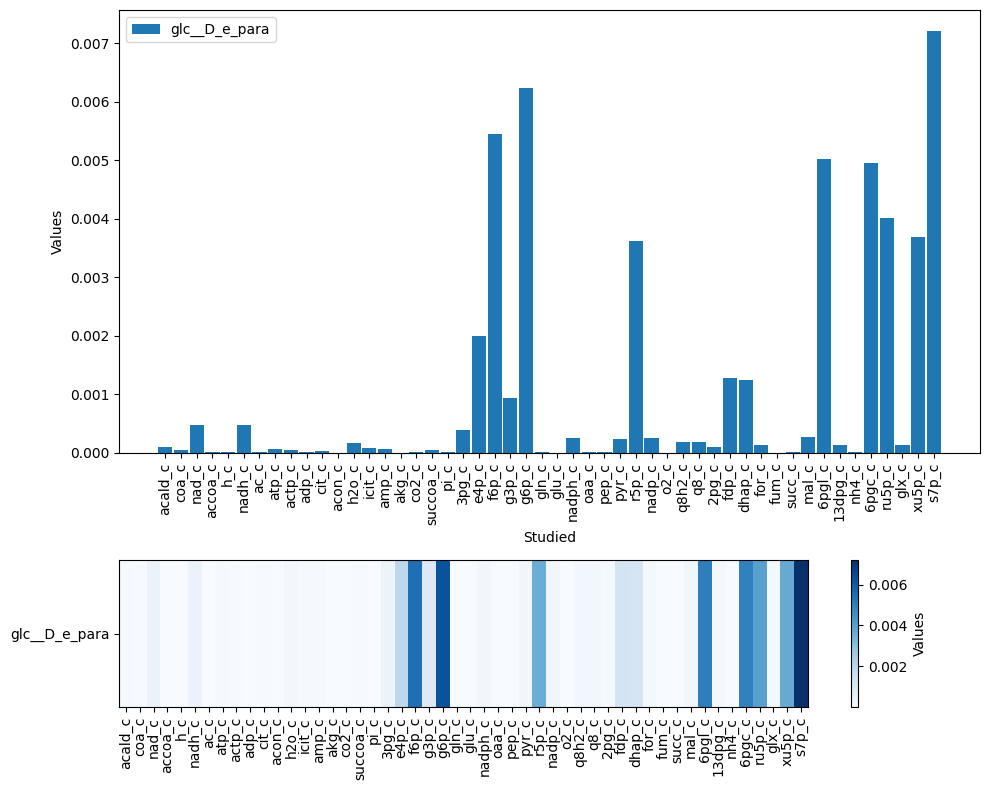

In [5]:
model.plot_focus(["glc__D_e_para","PFK"])

In [6]:
model.sampling.add_data([], "all_e_s", mean = True, SD = 0.5, distribution="uniform")

In [7]:
model.sampling.data

,Name,Type,Mean,Standard deviation,Distribution
0,[],all_e_s,True,0.5,uniform


In [8]:
for para in model.parameters.df.index :
    model.parameters.change(para,SD=0.01)

model.parameters.change("glc__D_e_para", SD=1)

In [9]:
model.activate_update = False
mean, SD, result = model.sampling.launch(N=10, type_result="MI", seed_constant=2, studied=["glc__D_e_para"])

running time of the code : 3.805724620819092 
So 0.3805724620819092 per occurences !


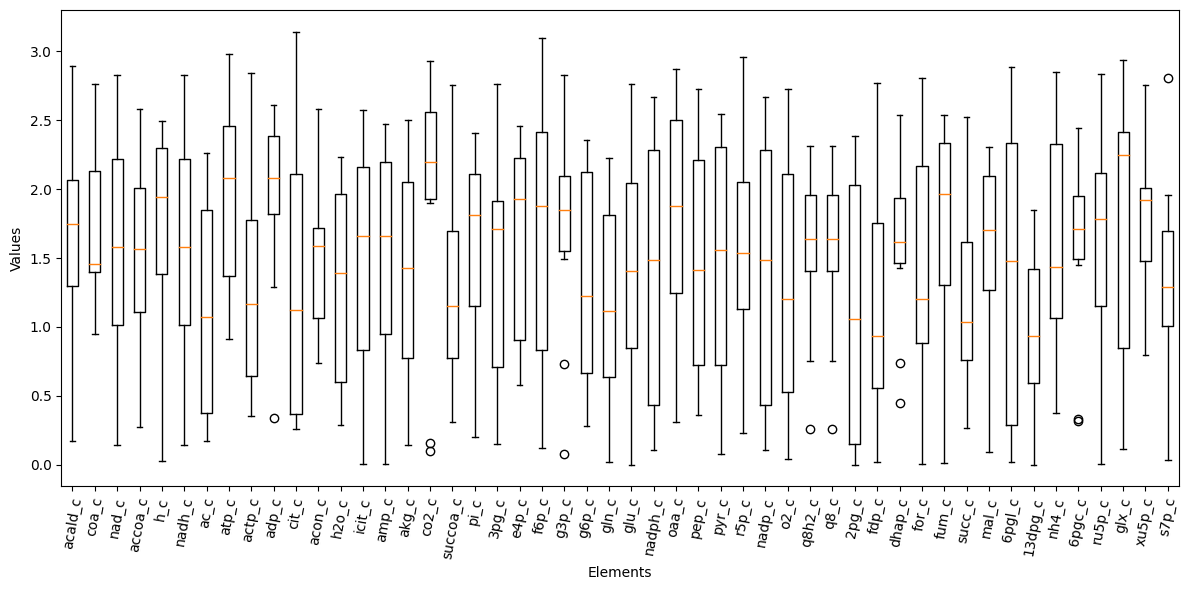

In [8]:
data = result['glc__D_e_para']
model.sampling.plot_boxplot(data, studied="internal")

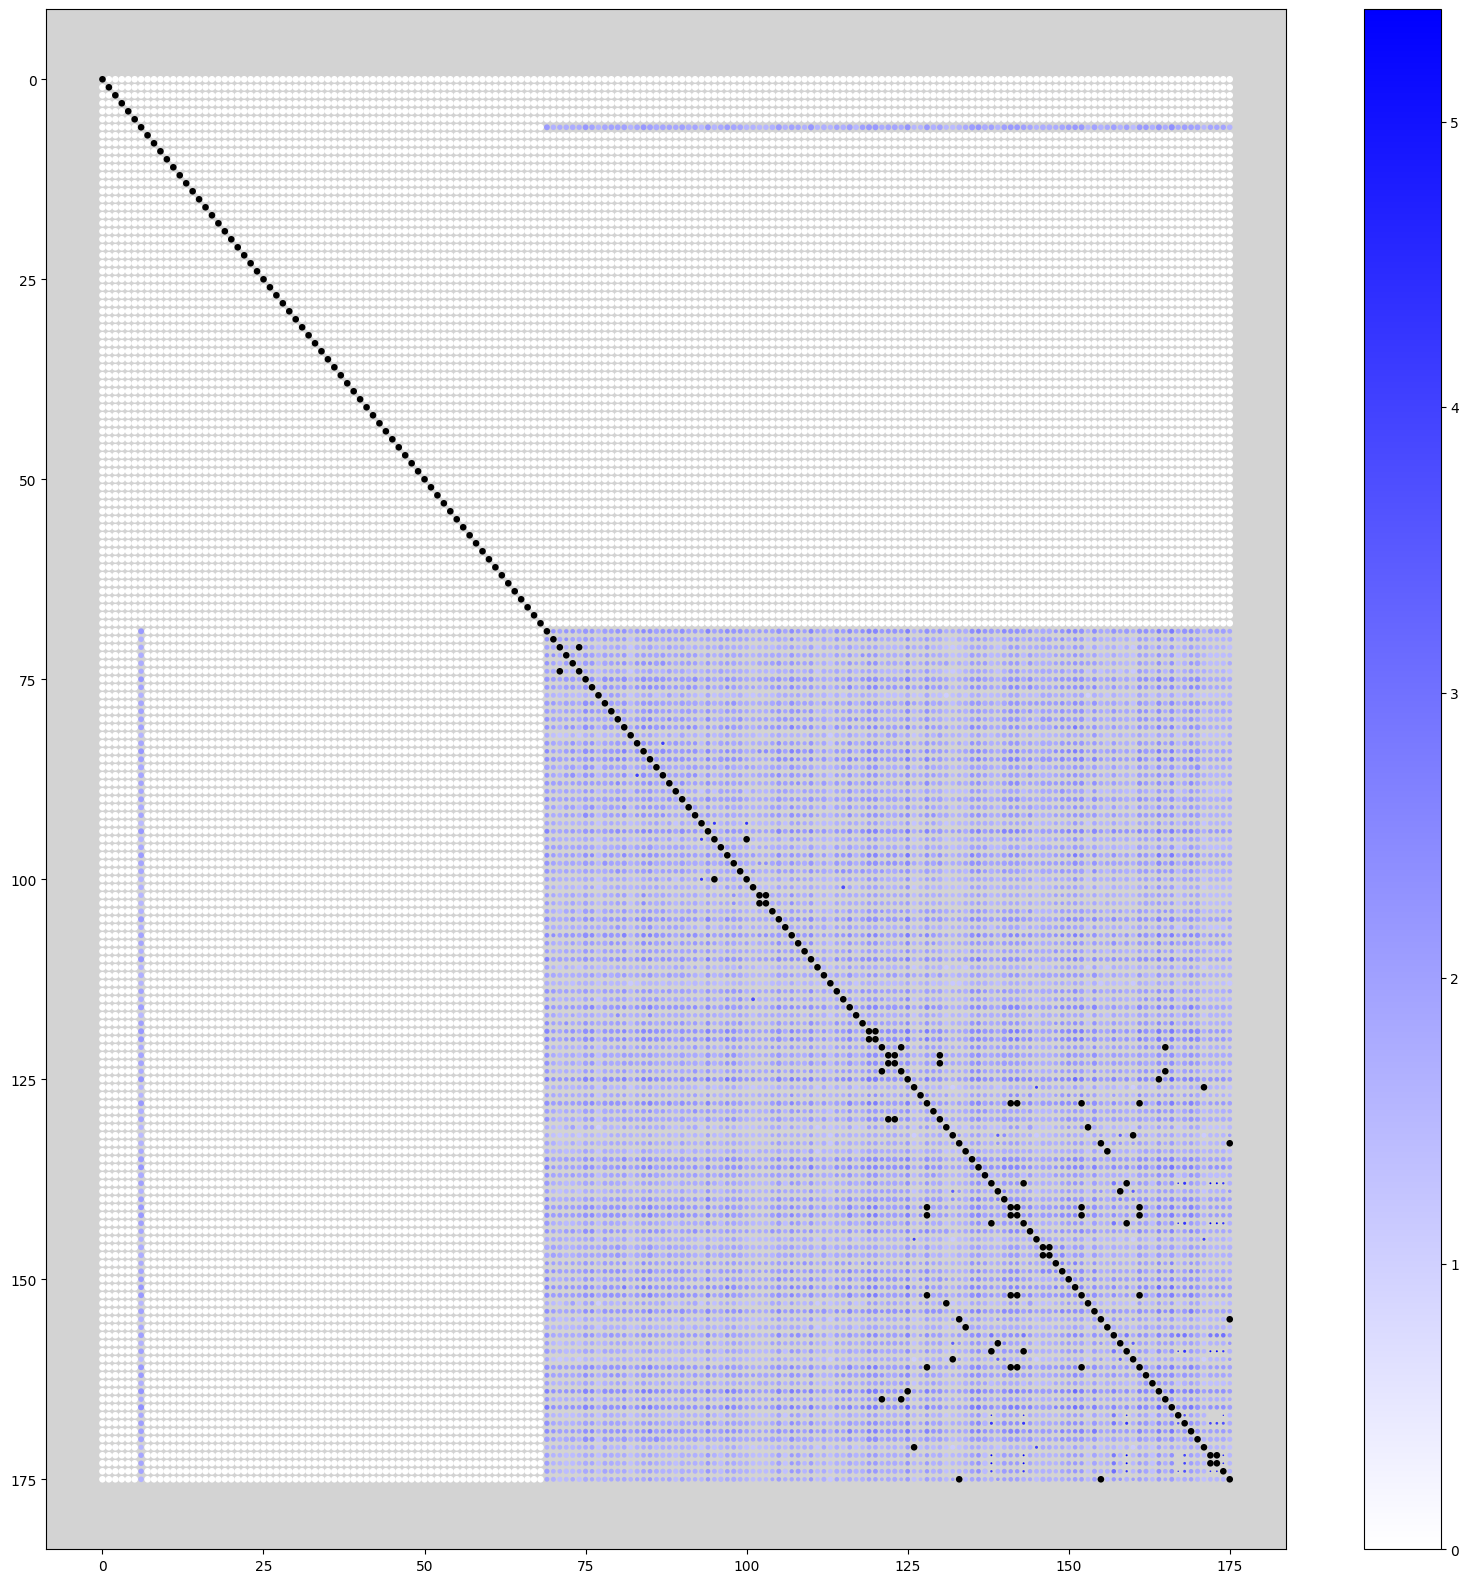

In [10]:
model.sampling.display(type_result="MI")

In [11]:
model.sampling.escher()

/home/alequertier/.local/lib/python3.10/site-packages/jupyter_client/session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Builder(height=600, metabolite_data={'acald_c': 2.1350575023611547, 'coa_c': 1.6507494853000224, 'nad_c': 1.78…